In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Define a function to plot digits
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

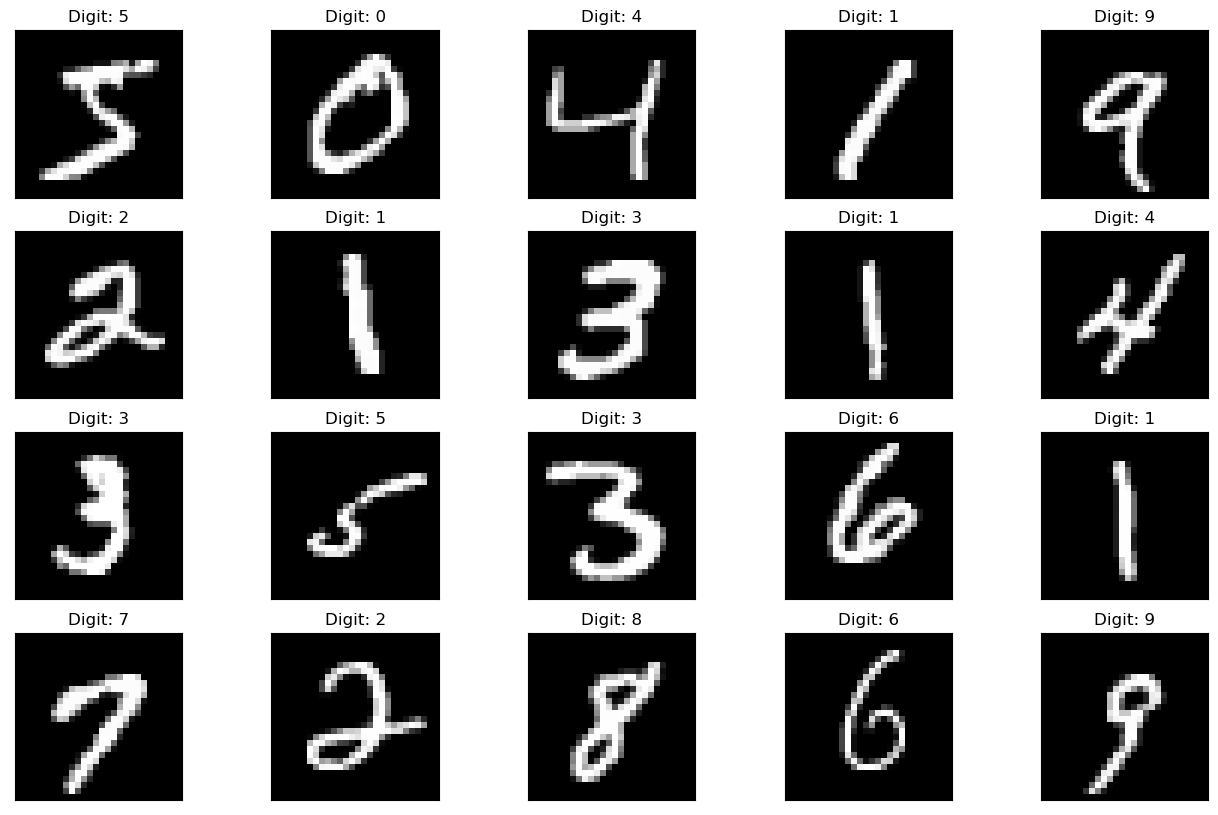

In [6]:
# Display the first 20 digits
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)


In [7]:
plt.show()

In [8]:
# Reshape the data to include a channel dimension
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

In [9]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [10]:
# Define the optimizer and compile the model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2344 - accuracy: 0.9286
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0746 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0469 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0249 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0178 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0135 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0101 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0068 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

1/1 [==============================] - 0s 16ms/step


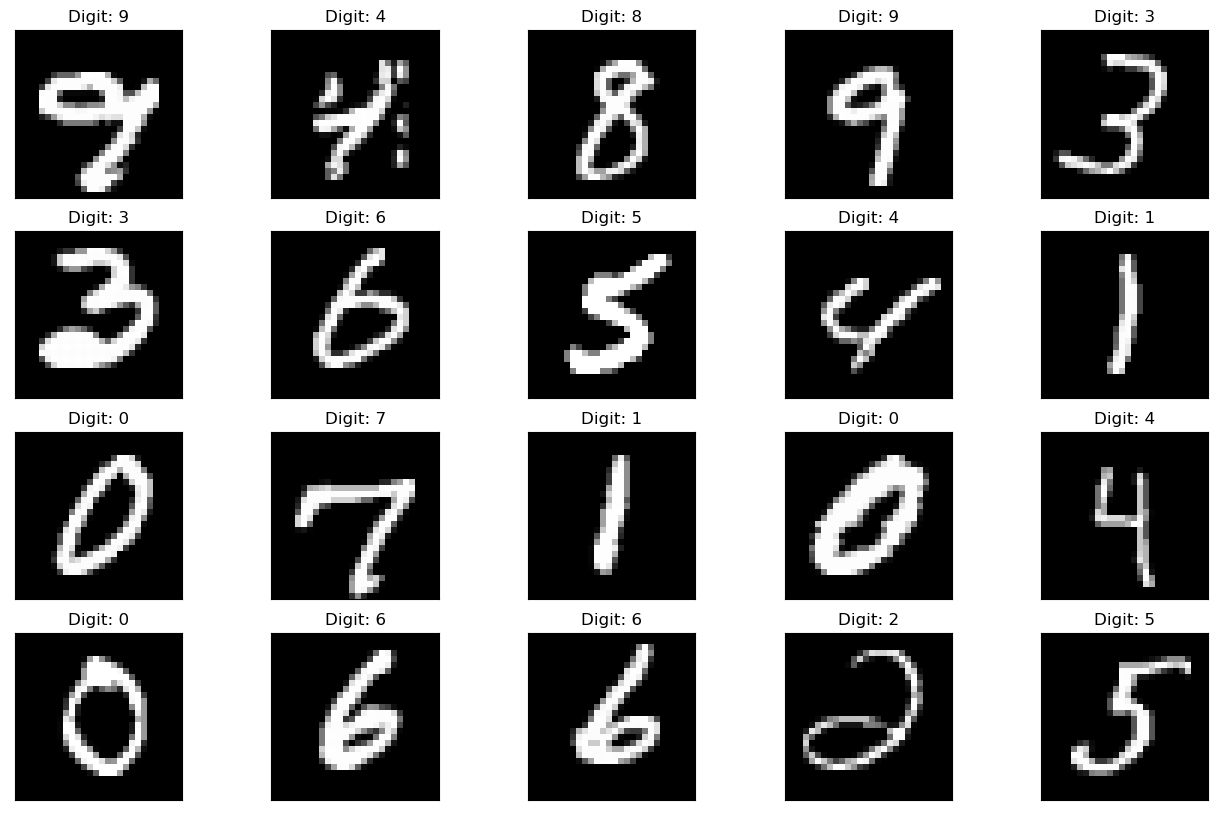

In [13]:
# Display the predictions for random test images
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()


In [14]:
# Make predictions on the test set and calculate accuracy
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

313/313 [==============================] - 1s 2ms/step
Accuracy: 98.66%


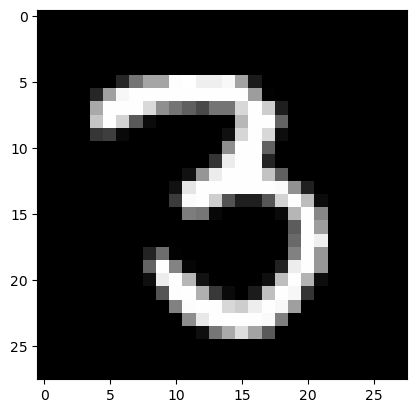

In [15]:
# Display a random test image and its predicted value
n = random.randint(0, 9999)
plt.imshow(X_test[n].squeeze(), cmap='gray')
plt.show()

In [16]:
predicted_value = model.predict(X_test)
predicted_digit = np.argmax(predicted_value[n])
print("Handwritten number in the image is: {}".format(predicted_digit))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is: 3


In [17]:
# Evaluate the model on the test set and print the test loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: {:.2f}%'.format(score[1] * 100))

Test loss: 0.04385395720601082
Test accuracy: 98.66%
